In [1]:
import pandas as pd

In [5]:
df=pd.read_csv("main.csv",index_col=0)

In [6]:
df.shape

(112120, 15)

In [8]:
df.head()

,image,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,00000001_002.png,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
df.columns

Index(['image', 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration',
       'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema',
       'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia'],
      dtype='object')

In [11]:
df = df.sort_values(by='image').reset_index(drop=True)

In [12]:
df.head()

,image,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,00000001_002.png,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1


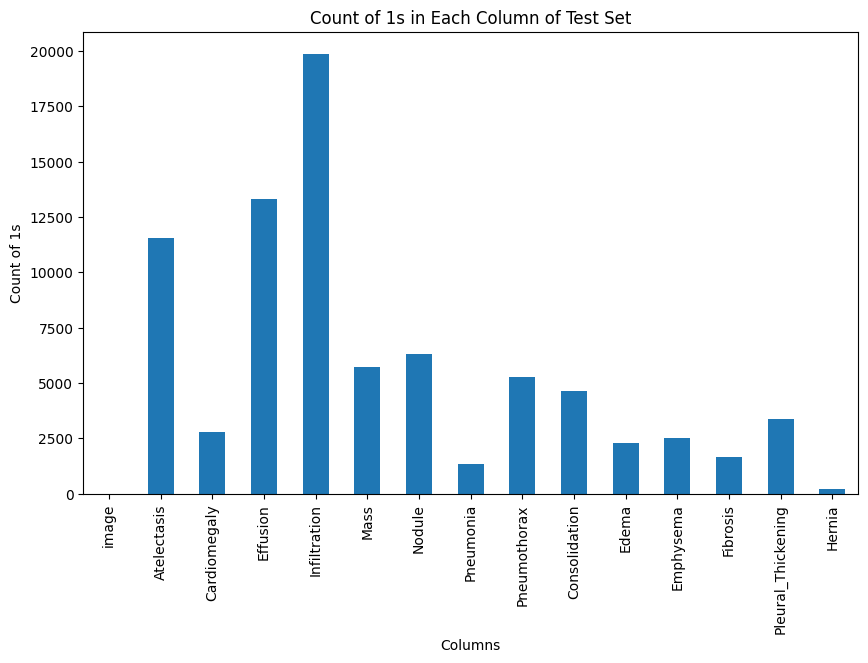

In [13]:
import matplotlib.pyplot as plt
one_counts = (df == 1).sum()

plt.figure(figsize=(10, 6))
one_counts.plot(kind='bar')
plt.title('Count of 1s in Each Column of Test Set')
plt.xlabel('Columns')
plt.ylabel('Count of 1s')
plt.xticks(rotation=90)
plt.show()

In [14]:
df_final = df.iloc[:24999]

In [15]:
df_final.tail()

,image,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
24994,00006585_002.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24995,00006585_003.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24996,00006585_004.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24997,00006585_005.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24998,00006585_006.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df_final.shape

(24999, 15)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_final is your DataFrame with an "id" column
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Extracting first 8 digits from "id" column
df_final['id_first_8_digits'] = df_final['image'].astype(str).str[:8]

# Get unique values of first 8 digits
unique_ids = df_final['id_first_8_digits'].unique()

# Splitting based on unique values to prevent leakage
train_ids, remaining_ids = train_test_split(unique_ids, test_size=(1 - train_size), random_state=42)
val_proportion = val_size / (val_size + test_size)
val_ids, test_ids = train_test_split(remaining_ids, test_size=(1 - val_proportion), random_state=42)

# Creating train, validation, and test sets
train_df = df_final[df_final['id_first_8_digits'].isin(train_ids)]
val_df = df_final[df_final['id_first_8_digits'].isin(val_ids)]
test_df = df_final[df_final['id_first_8_digits'].isin(test_ids)]

# Print sizes of each set
print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")


Training set size: 17541
Validation set size: 4051
Test set size: 3407


C:\Users\HP\AppData\Local\Temp\ipykernel_20916\2045233587.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['id_first_8_digits'] = df_final['image'].astype(str).str[:8]


In [35]:
train_df=train_df.drop(columns=['id_first_8_digits'])
test_df=test_df.drop(columns=['id_first_8_digits'])
val_df=val_df.drop(columns=['id_first_8_digits'])

In [36]:
# Save datasets as CSV files
train_df.to_csv('train_set.csv', index=False)
val_df.to_csv('validation_set.csv', index=False)
test_df.to_csv('test_set.csv', index=False)
print("CSV files have been created successfully.")

CSV files have been created successfully.


In [39]:
# Save datasets as txt files
train_df.to_csv('train_set.txt', index=False,sep=' ')
val_df.to_csv('validation_set.txt', index=False,sep=' ')
test_df.to_csv('test_set.txt', index=False,sep=' ')
print("txt files have been created successfully.")

txt files have been created successfully.


In [20]:
train_df.head()

,image,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,id_first_8_digits
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,00000001
1,00000001_001.png,0,1,0,0,0,0,0,0,0,0,1,0,0,0,00000001
2,00000001_002.png,0,1,1,0,0,0,0,0,0,0,0,0,0,0,00000001
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00000002
4,00000003_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1,00000003


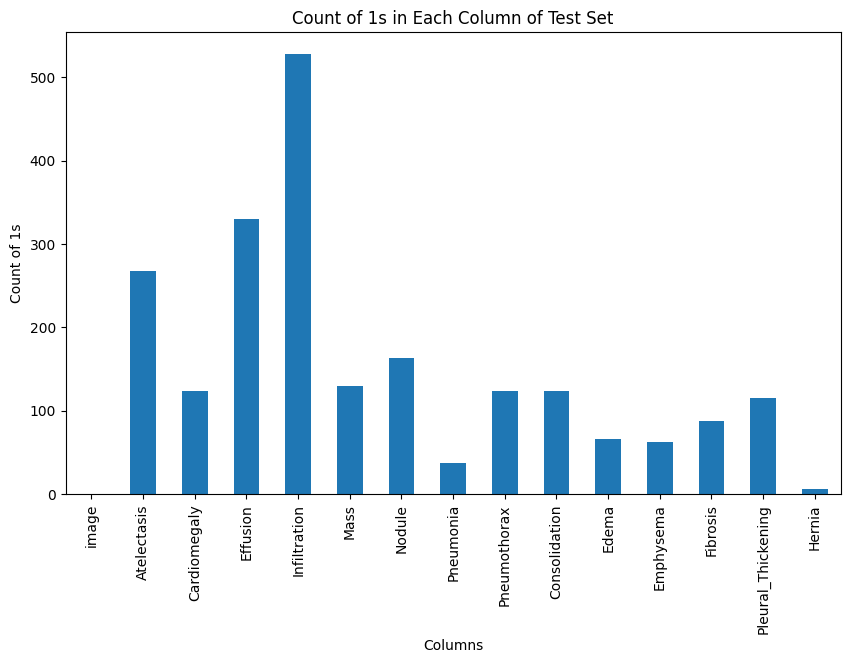

In [24]:
import matplotlib.pyplot as plt
one_counts = (test_df == 1).sum()

plt.figure(figsize=(10, 6))
one_counts.plot(kind='bar')
plt.title('Count of 1s in Each Column of Test Set')
plt.xlabel('Columns')
plt.ylabel('Count of 1s')
plt.xticks(rotation=90)
plt.show()

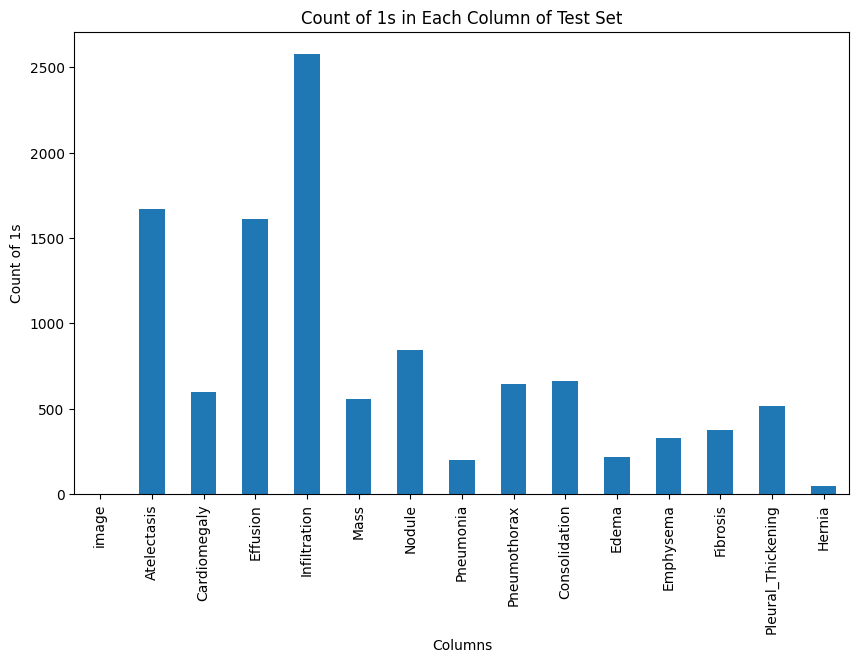

In [25]:
one_counts = (train_df == 1).sum()

plt.figure(figsize=(10, 6))
one_counts.plot(kind='bar')
plt.title('Count of 1s in Each Column of Test Set')
plt.xlabel('Columns')
plt.ylabel('Count of 1s')
plt.xticks(rotation=90)
plt.show()

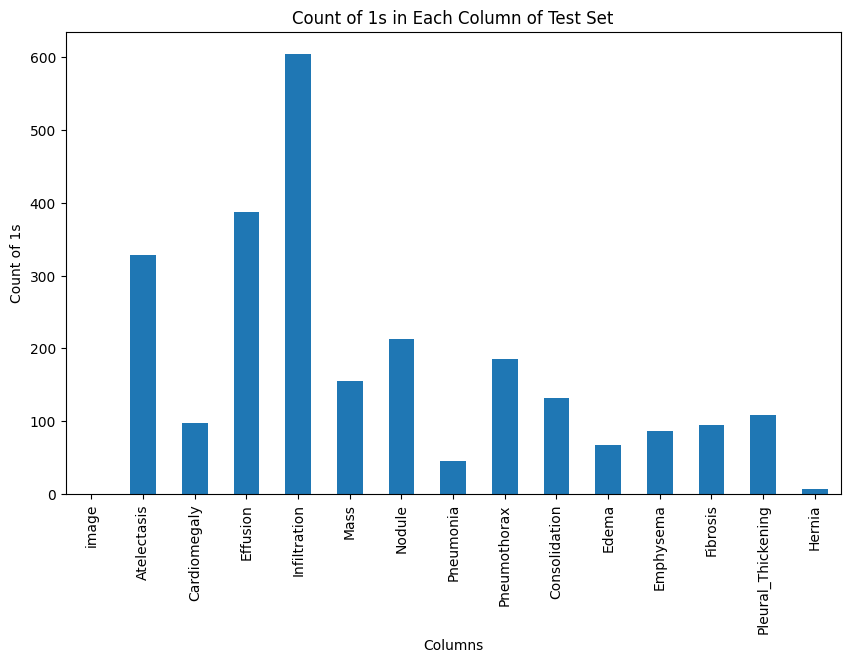

In [26]:
one_counts = (val_df == 1).sum()

plt.figure(figsize=(10, 6))
one_counts.plot(kind='bar')
plt.title('Count of 1s in Each Column of Test Set')
plt.xlabel('Columns')
plt.ylabel('Count of 1s')
plt.xticks(rotation=90)
plt.show()

In [27]:
df_final.tail()

,image,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,id_first_8_digits
24994,00006585_002.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,00006585
24995,00006585_003.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00006585
24996,00006585_004.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00006585
24997,00006585_005.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00006585
24998,00006585_006.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00006585


In [31]:
df_final.head()

,image,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,id_first_8_digits
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,00000001
1,00000001_001.png,0,1,0,0,0,0,0,0,0,0,1,0,0,0,00000001
2,00000001_002.png,0,1,1,0,0,0,0,0,0,0,0,0,0,0,00000001
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00000002
4,00000003_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1,00000003
